## Word2Vec 직접 구현

In [24]:
doc = 'you will never know until you try'

In [25]:
# 1. 입력 문장 토큰화

tokens = doc.split()
tokens

['you', 'will', 'never', 'know', 'until', 'you', 'try']

In [26]:
# 2. 가중치 행렬 초기화

V = len(set(tokens))    # 유니크한 차원 수
N = 4   # 임베딩 차원 수

import numpy as np

W1 = np.random.rand(V, N)
W2 = np.random.rand(N, V)

print(W1)
print(W2)

[[0.03816828 0.74188778 0.04592101 0.95202645]
 [0.84903124 0.11419547 0.01621604 0.11555662]
 [0.20636574 0.99588648 0.22971857 0.23061903]
 [0.49086568 0.26819805 0.18939815 0.05503837]
 [0.5876406  0.17560981 0.1317927  0.0129684 ]
 [0.38788854 0.85848393 0.13989137 0.96890487]]
[[0.97622407 0.73718422 0.4654807  0.38895506 0.02525644 0.11375258]
 [0.9281162  0.12078288 0.04103032 0.40607406 0.61450199 0.7952712 ]
 [0.03659566 0.71988757 0.01323365 0.80149264 0.62915307 0.42487886]
 [0.13065001 0.54274967 0.85065244 0.75103979 0.54516417 0.42373655]]


In [27]:
one_hot_vector = np.eye(V)
word2idx = {v: i for i, v in enumerate(set(tokens))}
one_hot_vector, word2idx

(array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]),
 {'know': 0, 'until': 1, 'never': 2, 'try': 3, 'you': 4, 'will': 5})

In [28]:
# 학습을 위한 데이터 구축
training_data = [
    # [target_word, (context_words)]
]

window_size = 1
for i, token in enumerate(tokens):
    target_word = token
    context_words = []
    if i-1 >= 0 :
        context_words.append(tokens[i-1])
    
    if i + 1 < len(tokens):
        context_words.append(tokens[i+1])
    training_data.append([target_word, context_words])
training_data

[['you', ['will']],
 ['will', ['you', 'never']],
 ['never', ['will', 'know']],
 ['know', ['never', 'until']],
 ['until', ['know', 'you']],
 ['you', ['until', 'try']],
 ['try', ['you']]]

In [29]:
# 학습

learning_rate = 0.01
loss_list = []
for epoch in range(100):
    loss_total = 0
    for target_word, context_words in training_data:
        # Feed Forward
        # 1. Input - Hidden
        for word in context_words:
            hidden_vector = one_hot_vector[word2idx[word], :].reshape(1, V).dot(W1)
            # print(hidden_vector)

            # 2. Hidden - Output
            output_vector = hidden_vector.dot(W2) #  1 X 6 행렬

            # Activation Function (Softmax)
            def softmax(x):
                return np.exp(x) / np.sum(np.exp(x))

            y_hat = softmax(output_vector)
            y_real = one_hot_vector[word2idx[target_word], :] # (6, )
            
            # 3. Loss 계산 Cross Entropy loss
            loss = -np.sum(y_real * np.log(y_hat))

            loss_total += loss

            # 4. Backpropagation
            gradient_w2 = hidden_vector.T.dot(y_hat - y_real)   # 1X4 * 1X6 -> 4X6
            # print(gradient_w2)

            # one_hot_vector -> 1x6
            # w2 -> 4x6
            # y_hat-y_real -> 1x6
            # 4X1.T -> 1x4

            gradient_w1 = (y_hat-y_real).dot(W2.T)

            W1[word2idx[word], :] -= learning_rate * gradient_w1.ravel()
            W2 -= learning_rate * gradient_w2

            # W1 특정 부분만 업데이트 (1X4)
    loss_list.append(loss)
W1, W2

(array([[ 0.15185936,  0.12749316,  0.01978813,  1.41695569],
        [ 1.08680059,  0.63098954, -0.10192156, -0.10916407],
        [ 0.23879737,  1.46839075, -0.01165616, -0.40842101],
        [ 0.42506997,  0.48695084,  0.38662586,  0.24414924],
        [ 0.20148925, -0.22978623,  0.77131449, -0.18243094],
        [ 0.24573426,  0.8602057 , -0.00168408,  1.48338558]]),
 array([[ 0.9950598 ,  0.5313193 ,  0.1511313 ,  0.18503294,  0.77136214,
          0.07294759],
        [ 1.12111852, -0.17136098,  0.18987571, -0.19356027,  0.94669089,
          1.01301278],
        [-0.21458205,  0.82015976, -0.14695685,  0.90994483,  0.59841084,
          0.65826492],
        [-0.35534348,  0.9821086 ,  1.65319957,  0.23924081,  0.87379837,
         -0.14901124]]))

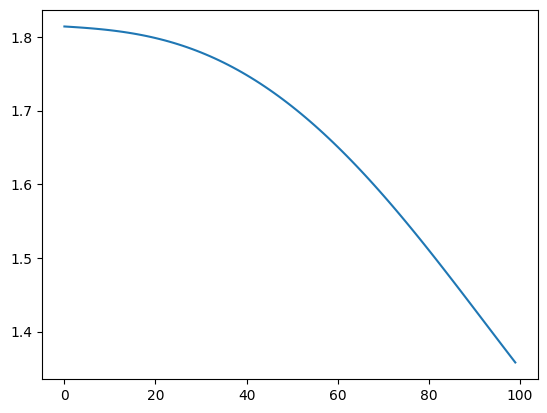

In [30]:
import matplotlib.pyplot as plt

plt.plot(loss_list)
plt.show()

# 1 Word2Vec

In [10]:
# 필요한 데이터를 불러와 it_df와 culture_df에 저장한다
import pandas as pd
it_df = pd.read_csv('./data/Word Representation_it.csv').dropna()
culture_df = pd.read_csv('./data/Word Representation_it.csv').dropna()

In [11]:
# word2vec을 하기 위한 전처리
# it_df와 culture_df의 컬럼 '1'의 토큰을 리스트 형태로 변경
it_token_ls = list(it_df.loc[:,'1'])
culture_token_ls = list(culture_df.loc[:,'1'])

total_token_ls = it_token_ls + culture_token_ls  # it_df의 리스트와 culture_df의 리스트를 한개로 합침

# 리스트의 값을 ','로 분리
total_token_ls = [tokens.split(',') for tokens in total_token_ls]
print(total_token_ls[0][:10])

['배', '정회', '신임', '과학기술', '일자리', '진흥', '원장', '아시아', '경제', '이민']


In [12]:
# gensim이라는 패키지에 word2Vec 클래스 사용
from gensim.models import Word2Vec
word2vec = Word2Vec( sentences = total_token_ls,      # 학습시킬 문장
                     vector_size = 10,         # 임베딩된 단어 벡터의 차원 크기
                     alpha = 0.025,     # 학습률(Learning rate)
                     min_count=2,       # 2번 미만 등장한 단어는 제외
                     window = 8,        # 문맥의 크기 (window_size)
                     sample = 0.001,    # sub-sampling
                     sg = 1,            # 0: CBOW, 1: Skip-gram
                     epochs = 10         # 전체 문장 반복학습 횟수(epoch)
)

In [ ]:
# '인공'의 단어 임베딩
word_embedding = word2vec.wv.__getitem__('인공')
print(word_embedding)

In [ ]:
# '데이터'의 단어 임베딩
word_embedding = word2vec.wv.__getitem__('데이터')
print(word_embedding)

In [ ]:
# '인공'과 유사도가 높은 단어
word_similar_1 = word2vec.wv.most_similar('인공')
print(word_similar_1)

#'데이터'와 유사도가 높은 단어
word_similar_2 = word2vec.wv.most_similar('데이터')
print(word_similar_2)


# 2 GloVe

- 더이상 지원하지 않음

In [ ]:
# !pip install glove_python_binary

# from glove import Corpus, Glove

# corpus = Corpus()
# corpus.fit(total_token_ls, window=5)
# # 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

# glove = Glove(no_components=100, learning_rate=0.05)
# glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
# glove.add_dictionary(corpus.dictionary)
# # 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

# glove.most_similar("인공")
# glove.most_similar("지능")

# 3 FastText

In [ ]:
from gensim.models.word2vec import Text8Corpus
from gensim.models import FastText

# FastText 모델생성
ft_model = FastText(total_token_ls,
                      vector_size=10,                 # 임베딩된 단어 벡터의 차원 크기
                      window=8,                 # 문맥의 크기(window_size)
                      min_count=2,            # 2번 미만 등장한 단어는 제외
                      alpha = 0.025,                    # 학습률(Learning rate)
                      sg = 1,                             # 0: CBOW, 1: Skip-gram
                      epochs = 10,              # 전체 문장 반복학습 횟수(epoch)
                      min_n=3, max_n=6)            # 최소, 최대 N-gram 수

In [ ]:
# Getting most similar vectors
print(ft_model.wv.most_similar('인공'))

# Getting most similar vectors
print(ft_model.wv.most_similar('안공지능'))

In [ ]:
ft_model.wv['너지']